In [49]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

Alto : 168
Ancho : 300
Canales : 3


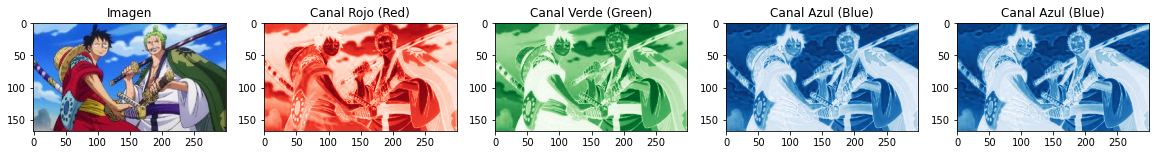

In [50]:

def load_image(path_image):
    img = cv.imread(path_image)
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)

img = load_image('/One.jpg')

print(f'Alto : {img.shape[0]}')
print(f'Ancho : {img.shape[1]}')
print(f'Canales : {img.shape[2]}')


plt.figure(figsize=(20,5))

ax = plt.subplot(2,5,1)
ax.imshow(img)
ax.set_title('Imagen')

ax = plt.subplot(2,5,2)
ax.imshow(img[...,0],cmap='Reds')
ax.set_title('Canal Rojo (Red)')

ax = plt.subplot(2,5,3)
ax.imshow(img[...,1],cmap='Greens')
ax.set_title('Canal Verde (Green)')


ax = plt.subplot(2,5,4)
ax.imshow(img[...,2],cmap='Blues')
ax.set_title('Canal Azul (Blue)');
ax = plt.subplot(2,5,5)
ax.imshow(img[...,2],cmap='Blues')
ax.set_title('Canal Azul (Blue)');

Text(0.5, 1.0, 'Canal B')

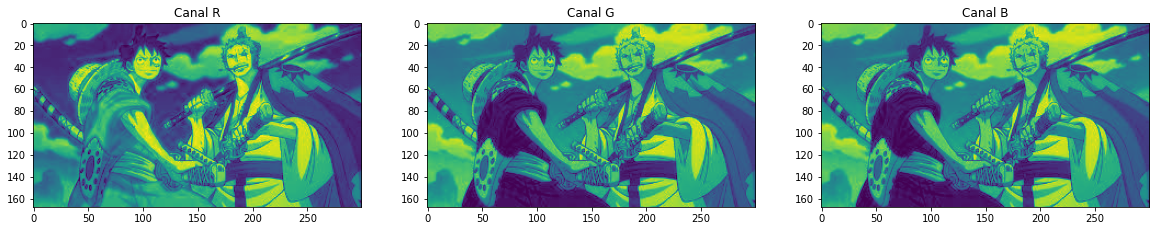

In [58]:
R= img[...,0]
G= img[...,1]
B= img[...,2]
plt.figure(figsize=(20,5))

ax = plt.subplot(1,3,1)
ax.imshow(R)
ax.set_title('Canal R')

ax =plt.subplot(1,3,2)
ax.imshow(G)
ax.set_title('Canal G')

ax = plt.subplot(1,3,3)
ax.imshow(G)
ax.set_title('Canal B')

RGB a HSV

In [54]:
def rgbtohsv(img):
  hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
  return hsv


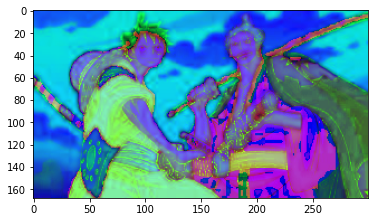

In [60]:
HSV = rgbtohsv(img)
plt.imshow(HSV)

**Espacio de color CMYK**

El modelo CMYK (siglas de Cyan, Magenta, Yellow y Key) es un modelo de color sustractivo que se utiliza en la impresión en colores. Es la versión moderna y más precisa del antiguo modelo tradicional de coloración (RYB), que se utiliza todavía en pintura y artes plásticas. Permite representar una gama de colores más amplia que este último, y tiene una mejor adaptación a los medios industriales.

Este modelo se basa en la mezcla de pigmentos de los siguientes colores para crear otros más:

 -C = Cyan (Cian).

 -M = Magenta (Magenta).

 -Y = Yellow (Amarillo).
 
 -K = Key (Negro).

Se le llama key al negro, en vez de usar la letra B, por ser un nombre corto del término key plate utilizado en la impresión. Esta placa maestra imprimía el detalle artístico de una imagen, usualmente en tinta negra. El uso de la letra K también ayudó a evitar confusiones con la letra B utilizada en el acrónimo RGB.

La mezcla de colores CMY ideales es sustractiva (puesto que la mezcla de cian, magenta y amarillo en fondo blanco resulta en el color negro). El modelo CMYK se basa en la absorción de la luz. El color que presenta un objeto corresponde a la parte de la luz que incide sobre este y que no es absorbida por el objeto.

El cian es el opuesto al rojo, lo que significa que actúa como un filtro que absorbe dicho color (-R +G +B). Magenta es el opuesto al verde (+R -G +B) y amarillo el opuesto al azul (+R +G -B).-

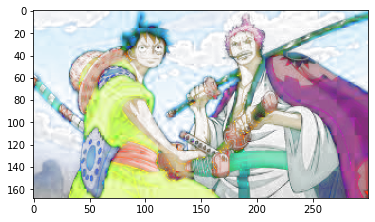

In [62]:
img = plt.imread("/One.jpg")

# Create float
bgr = img.astype(float)/255.

# Extract channels
with np.errstate(invalid='ignore', divide='ignore'):
	K = 1 - np.max(bgr, axis=2)
	C = (1-bgr[...,2] - K)/(1-K)
	M = (1-bgr[...,1] - K)/(1-K)
	Y = (1-bgr[...,0] - K)/(1-K)

# Convert the input BGR image to CMYK colorspace
CMYK = (np.dstack((C,M,Y,K)) * 255).astype(np.uint8)

# Split CMYK channels
Y, M, C, K = cv.split(CMYK)

np.isfinite(C).all()
np.isfinite(M).all()
np.isfinite(K).all()
np.isfinite(Y).all()

# Save channels
cv.imwrite('C:/path/to/C.jpg', C)
cv.imwrite('C:/path/to/M.jpg', M)
cv.imwrite('C:/path/to/Y.jpg', Y)
cv.imwrite('C:/path/to/K.jpg', K)
plt.imshow(CMYK)